In [1]:
import math
import numpy as np
from numpy.random import poisson
import matplotlib.pyplot as plt
import matplotlib.font_manager

# setting rcParams: Avenir for text, LaTeX for math
font = matplotlib.font_manager.FontProperties(fname="/System/Library/Fonts/Avenir.ttc")
plt.rcParams.update({
    'text.usetex': True,  
    'font.family': 'sans-serif',
    'font.sans-serif': 'Avenir', 
    'text.latex.preamble': r"\usepackage{amsmath}" 
})

# toning down black color
plt.rcParams.update({
    'axes.facecolor': 'none',
    'figure.facecolor': 'none',
    'axes.edgecolor': '#333',
    'axes.labelcolor': '#333',
    'xtick.color': '#333',
    'ytick.color': '#333',
    'text.color': '#333'
})

In [2]:
def sim(N, s, mu, f0, t): # pop. size, fitness effect, mutation rate, initial mutant frequency, simulation time
    ts = []; fs = []
    w = math.exp(s) # converting Malthusian fitness to Wrightian fitness
    f = f0 # mutant allele population frequency
    
    for t in range(1, t + 1):
        
        # number of mutant individuals due to selection, one-way mutation, and drift:
        n_1 = poisson(N * f * w / (1 - f + w * f)) + poisson(N * mu * (1 - f) / (1 - f + w * f)) 
        
        # number of wildtype individuals:
        n_0 = poisson(N * (1 - mu) * (1 - f) / (1 - f + w * f))
        
        f = n_1 * 1.0/(n_0 + n_1)
        ts.append(t); fs.append(f)
        
    return ts, fs


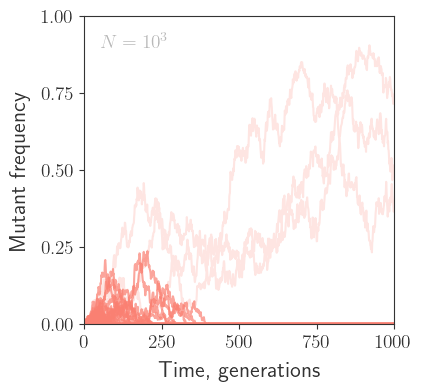

In [3]:
plt.figure(figsize=(4, 4))

for i in range(1000):
    ts, fs = sim(1000, 0, 0, 1e-3, 1000)
    if fs[-1] > 1e-3:
        plt.plot(ts, fs, c='#fee5e2', alpha=1, zorder=-1)
    else:
        plt.plot(ts, fs, c='#fa8072', alpha=0.7)

plt.xticks([0, 250, 500, 750, 1000])
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.tick_params(axis='both', labelsize=14)

#plt.yscale('log'); plt.minorticks_off(); plt.ylim(1e-3, 1e0)
plt.ylim(0, 1) 
plt.xlim(0, ts[-1])

plt.xlabel('Time, generations', fontproperties=font, fontsize=16, labelpad=8)
plt.ylabel('Mutant frequency', fontproperties=font, fontsize=16, labelpad=8)
plt.text(50, 0.9, r"$N=10^3$", fontsize=14, color='#b9b9b9')

plt.savefig('../img/neutral_N=1e3.png', dpi=600, bbox_inches='tight')